In [2]:
#loading all the libraries needed :
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the csv files using pandas
train_data = pd.read_csv("mnist_train.csv")
test_data = pd.read_csv("mnist_test.csv")

In [4]:
train_data.shape # print the dimension off the training data

(59999, 785)

In [5]:
test_data.shape # print the dimension of the testing data

(9999, 785)

In [6]:
train_data.head() # printing first five columns of train_data

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_data.head() # printing first five columns of test_data

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_data.describe()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
count,9999.000000,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,...,9999.000000,9999.000000,9999.000000,9999.000000,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
mean,4.443144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179318,0.163616,0.052605,0.000600,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674433,5.736359,2.420125,0.060003,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
train_data.describe()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
count,59999.000000,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,...,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.0,59999.0,59999.0,59999.0
mean,4.453924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200437,0.088868,0.045634,0.019284,0.015117,0.002000,0.0,0.0,0.0,0.0
std,2.889294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042522,3.956222,2.839868,1.686784,1.678297,0.346603,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [10]:
# about the dataset

# dimensions
print("Dimensions: ",test_data.shape, "\n")

# data types
print(test_data.info())

# head
test_data.head()

Dimensions:  (9999, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 785 entries, 7 to 0.667
dtypes: int64(785)
memory usage: 59.9 MB
None


,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# about the dataset

# dimensions
print("Dimensions: ",train_data.shape, "\n")

# data types
print(train_data.info())

# head
train_data.head()

Dimensions:  (59999, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Columns: 785 entries, 5 to 0.617
dtypes: int64(785)
memory usage: 359.3 MB
None


,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
print(train_data.columns)

Index(['5', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.608', '0.609', '0.610', '0.611', '0.612', '0.613', '0.614', '0.615',
       '0.616', '0.617'],
      dtype='object', length=785)


In [13]:
print(test_data.columns)

Index(['7', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.658', '0.659', '0.660', '0.661', '0.662', '0.663', '0.664', '0.665',
       '0.666', '0.667'],
      dtype='object', length=785)


In [15]:
order = list(np.sort(train_data['5'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


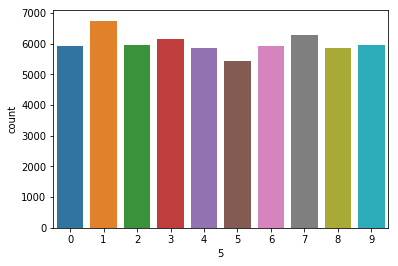

In [16]:
## Visualizing the number of class and counts in the datasets

sns.countplot(train_data["5"])

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5420
Name: 5, dtype: int64

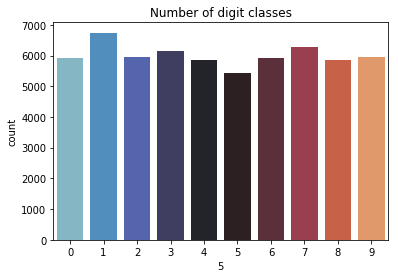

In [18]:
## Visualizing the number of class and counts in the datasets
plt.plot(figure = (16,10))
g = sns.countplot( train_data["5"], palette = 'icefire')
plt.title('Number of digit classes')
train_data["5"].astype('category').value_counts()

Text(0.5,1,'Digit Nr 4')

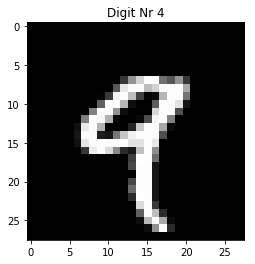

In [19]:
# Plotting some samples as well as converting into matrix

four = train_data.iloc[3, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit Nr 9")

# data preparation

In [20]:
# average feature values
round(train_data.drop('5', axis=1).mean(), 2)

0        0.00
0.1      0.00
0.2      0.00
0.3      0.00
0.4      0.00
0.5      0.00
0.6      0.00
0.7      0.00
0.8      0.00
0.9      0.00
0.10     0.00
0.11     0.00
0.12     0.00
0.13     0.01
0.14     0.00
0.15     0.00
0.16     0.00
0.17     0.00
0.18     0.00
0.19     0.00
0.20     0.00
0.21     0.00
0.22     0.00
0.23     0.00
0.24     0.00
0.25     0.00
0.26     0.00
0.27     0.00
0.28     0.00
0.29     0.00
         ... 
0.588    0.00
0.589    0.00
0.590    0.00
0.591    0.00
0.592    0.00
0.593    0.00
0.594    0.00
0.595    0.02
0.596    0.04
0.597    0.09
0.598    0.13
0.599    0.20
0.600    0.34
0.601    0.43
0.602    0.53
0.603    0.59
0.604    0.69
0.605    0.59
0.606    0.48
0.607    0.34
0.608    0.20
0.609    0.09
0.610    0.05
0.611    0.02
0.612    0.02
0.613    0.00
0.614    0.00
0.615    0.00
0.616    0.00
0.617    0.00
Length: 784, dtype: float64

In [21]:
## Separating the X and Y variable

y = train_data['5']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = '5')

## Printing the size of data 
print(train_data.shape)

(59999, 785)


In [22]:
## Normalization

X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (59999, 784)
test_data: (9999, 785)


In [23]:
# scaling the features
from sklearn.preprocessing import scale
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

# Model building

In [24]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [25]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9131111111111111 

[[1771    0   16    1    2   18   15    0    2    2]
 [   0 1992   13    7    3    2    1    3   14    3]
 [  15   20 1610   38   27   12   14   12   22    1]
 [  12   12   55 1547    3   80    3   16   31   18]
 [   4    4   19    0 1636    3    5    6    5   58]
 [  17   12   17   72   15 1448   14    3   38    6]
 [  17    6   18    2   13   25 1667    0    4    0]
 [   6   10   28   20   38    3    0 1738    7   52]
 [  18   43   46   57    9   51    8    7 1471   18]
 [  12    7   18   19   91   15    0   83   22 1556]]


In [26]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2, whiten=True)
pca.fit(X_train)
X_pca=pca.transform(X_train)


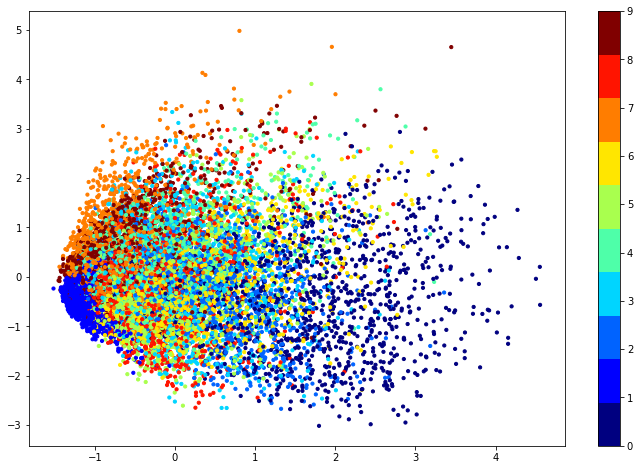

In [27]:
plt.figure(1, figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train, s=10,cmap=plt.get_cmap('jet',10))
plt.colorbar()

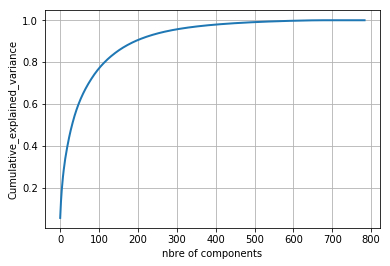

In [28]:
pca=PCA()
pca.fit(X_train)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('nbre of components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


Non-linear model :

In [29]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [30]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.943 

[[1784    0    7    0    1   10   16    4    5    0]
 [   0 1989   17    6    4    1    1   12    4    4]
 [  13    7 1661   13   17    0   14   28   17    1]
 [   2    8   26 1613    7   43    1   40   26   11]
 [   1    2   15    0 1667    3    3    9    5   35]
 [   6    3   10   30    9 1519   22   21   16    6]
 [  10    3    8    0    6   18 1681   25    1    0]
 [   1    9   14    5   24    0    0 1815    2   32]
 [   4   20   27   16    9   29    3   15 1596    9]
 [   4    3   11   29   36    5    0   70   16 1649]]


In [31]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [5,10]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 70.2min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [32]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,165.779563,0.903941,20.064075,0.037741,5,0.01,"{'C': 5, 'gamma': 0.01}",0.796250,0.789583,0.772500,...,0.784649,0.009245,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,30.627221,0.391427,9.841064,0.117382,5,0.001,"{'C': 5, 'gamma': 0.001}",0.955000,0.945833,0.944167,...,0.948412,0.005500,2,0.995208,0.995312,0.995937,0.995625,0.995938,0.995604,0.000305
2,28.755790,0.255237,10.550651,0.073668,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.935000,0.922083,0.915000,...,0.926911,0.008195,4,0.947390,0.950828,0.949682,0.948432,0.947708,0.948808,0.001281
3,164.967296,0.542876,20.057812,0.027922,10,0.01,"{'C': 10, 'gamma': 0.01}",0.796250,0.789583,0.772500,...,0.784649,0.009245,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,30.158589,0.429925,9.816452,0.115894,10,0.001,"{'C': 10, 'gamma': 0.001}",0.956667,0.945000,0.947917,...,0.949162,0.004524,1,0.998437,0.998333,0.998646,0.998437,0.998542,0.998479,0.000106
5,23.638229,0.305388,9.329068,0.089135,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.937917,0.923333,0.918333,...,0.930328,0.008123,3,0.957808,0.961038,0.960308,0.958329,0.957917,0.959080,0.001332


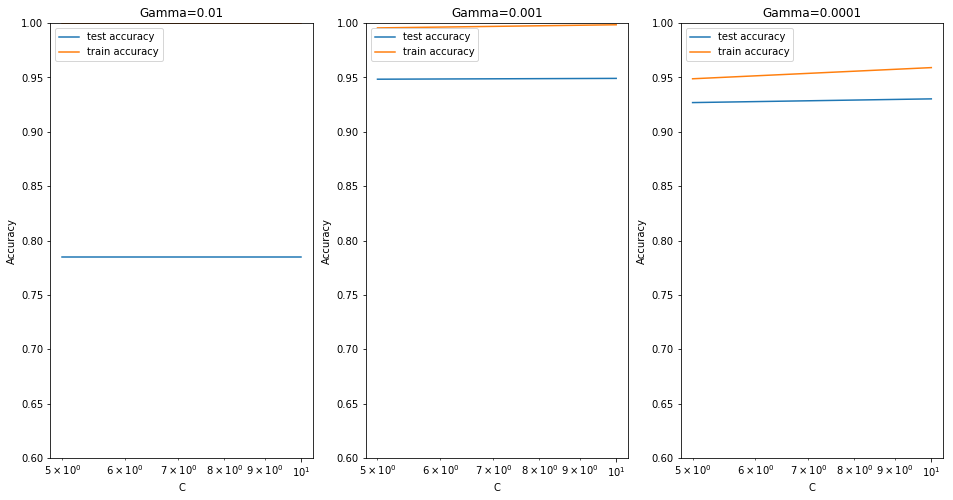

In [33]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,8))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [34]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9491624302025169 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


In [35]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9518888888888889 

[[1798    0    5    0    1   10    7    5    1    0]
 [   0 1995   14    7    2    1    1   11    3    4]
 [   9   10 1677   14   13    2   12   21   13    0]
 [   3    8   24 1642    3   32    1   32   23    9]
 [   1    3    8    0 1679    0    5    8    2   34]
 [   4    5   10   26    8 1542   14   19   11    3]
 [   8    4   10    0    3   15 1691   20    1    0]
 [   1    5   17    4   19    0    0 1834    4   18]
 [   7   15   19   24    8   21    4   12 1607   11]
 [   4    4   11   24   37    6    0   53   15 1669]] 



other tests

In [ ]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.1, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

In [ ]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.01, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

# pca-and-svm-on-mnist-dataset

In [37]:
import math
# Plots the image represented by a row
def plot_number(row, w=28, h=28, labels=True):
    if labels:
        # the first column contains the label
        label = row[0]
        # The rest of columns are pixels
        pixels = row[1:]
    else:
        label = ''
        # The rest of columns are pixels
        pixels = row[0:]
    
#    print(row.shape, pixels.shape)
        

    # Make those columns into a array of 8-bits pixels
    # This array will be of 1D with length 784
    # The pixel intensity values are integers from 0 to 255
    pixels = 255-np.array(pixels, dtype='uint8')

    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((w, h))

    # Plot
    if labels:
        plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')

# Plots a whole slice of pictures
def plot_slice(rows, size_w=28, size_h=28, labels=True):
    num = rows.shape[0]
    w = 4
    h = math.ceil(num / w)
    fig, plots = plt.subplots(h, w)
    fig.tight_layout()

    for n in range(0, num):
        s = plt.subplot(h, w, n+1)
        s.set_xticks(())
        s.set_yticks(())
        plot_number(rows.ix[n], size_w, size_h, labels)
    plt.show()

C:\Users\Hassan\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


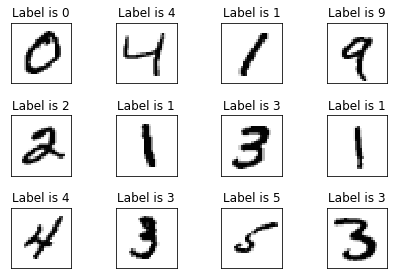

In [38]:
# Plotting first few rows
plot_slice(train_data[0:12])

In [41]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_test = sc_X.transform(X)

In [42]:
from sklearn.svm import SVC
print('SVM Classifier with gamma = 0.1; Kernel = Polynomial')
classifier = SVC(gamma=0.1, kernel='poly', random_state = 0)
classifier.fit(X_train,y_train)

SVM Classifier with gamma = 0.1; Kernel = Polynomial


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
#Predict the labels with Validation Data
y_pred = classifier.predict(X_test)

In [45]:
#Calculate the Model Accuracy and Confusion Matrix
from sklearn.metrics import accuracy_score,confusion_matrix
model_acc = classifier.score(X_test, y_test)
test_acc = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test,y_pred)
print('\nSVM Trained Classifier Accuracy: ', model_acc)
print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Validation Images: ',test_acc)
print('\nConfusion Matrix: \n',conf_mat)


SVM Trained Classifier Accuracy:  0.9605555555555556

Predicted Values:  [1 5 3 ... 6 0 1]

Accuracy of Classifier on Validation Images:  0.9605555555555556

Confusion Matrix: 
 [[1801    0   11    0    1    3    7    0    2    2]
 [   0 2004   11    8    4    2    1    2    3    3]
 [  10    3 1696    8   13    0    5    9   26    1]
 [   3    8   18 1649    2   25    1   16   42   13]
 [   0    2    9    0 1701    1    4    1    4   18]
 [   4    0    6   13    5 1570    7    4   18   15]
 [   5    2   12    4    7   17 1696    0    9    0]
 [   7    3   16    9   32    1    0 1806    4   24]
 [   6    5   18   12    5   16    1    2 1655    8]
 [   4    1   12   17   32    4    0   19   22 1712]]


In [48]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (11,9), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

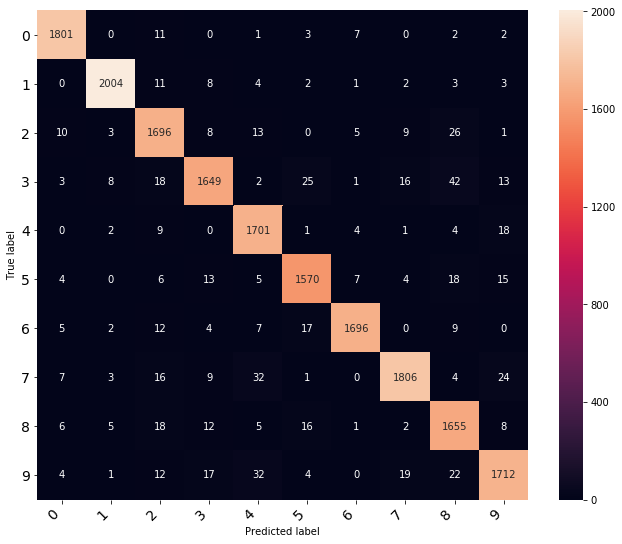

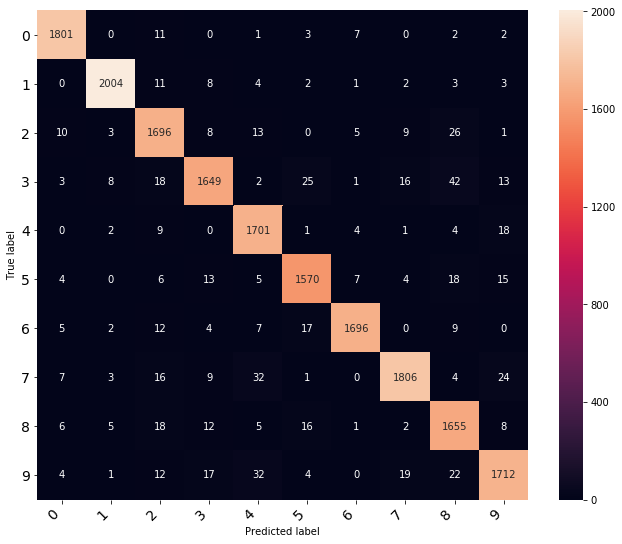

In [49]:
print_confusion_matrix(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred), class_names = [0,1,2,3,4,5,6,7,8,9])

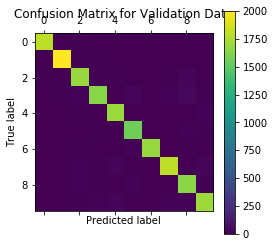

In [46]:
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

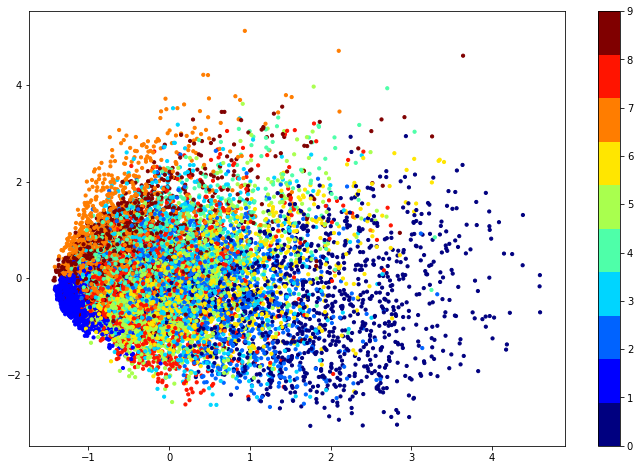

In [47]:
pca=PCA(n_components=2, whiten=True)
pca.fit(X_train)
X_pca=pca.transform(X_train)
plt.figure(1, figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train, s=10,cmap=plt.get_cmap('jet',10))
plt.colorbar()